<img src ="https://images.squarespace-cdn.com/content/v1/5a549bf64c0dbf97f730d260/1517329026027-6JBIA992QG0BYC4MH569/Data-Scientists+job.jpg" width="800" height="750">

### AIM 

To understsand the diffrent posistion of data scientist and their salary according to position.

### import required libraries 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt


### Read the data

In [4]:
ds=pd.read_csv('ds_Salaries.csv')

In [5]:
ds

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [8]:
ds.shape

(607, 12)

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [11]:
ds.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### JOB TITLES 

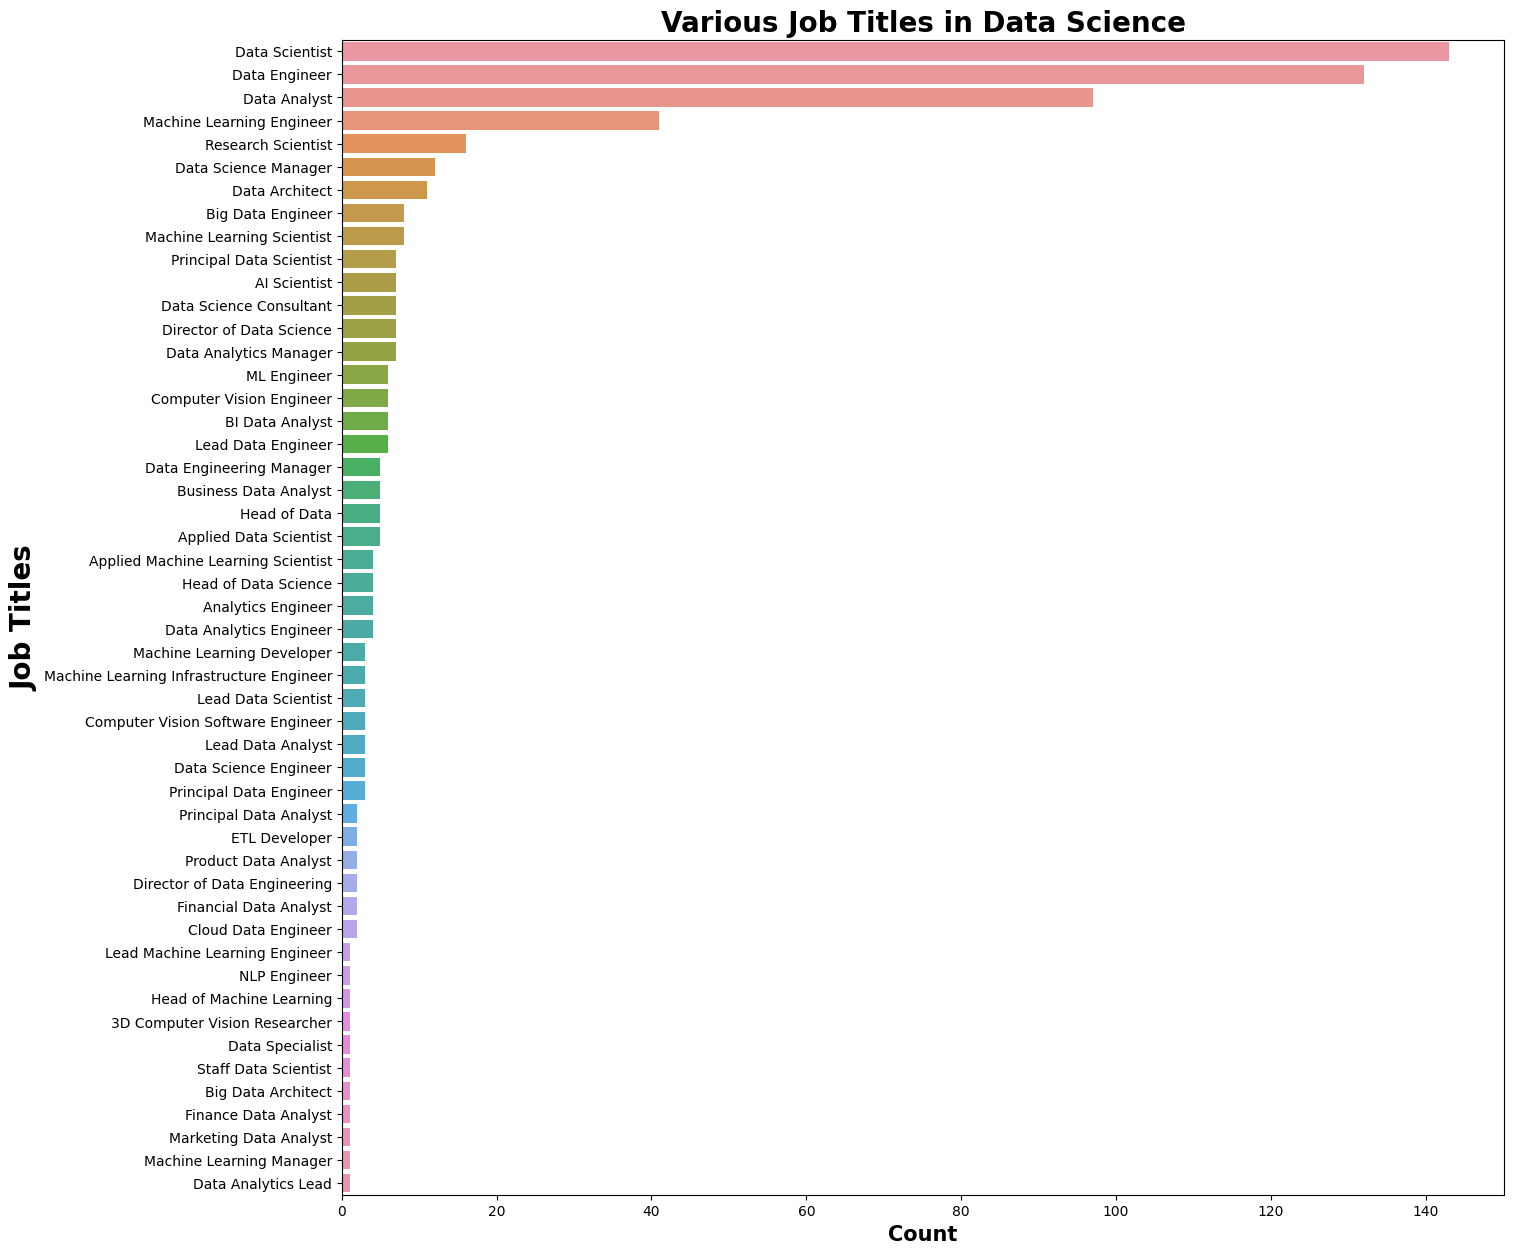

In [12]:
plt.figure(figsize=(15,15))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.countplot(y='job_title', data=ds, order=ds['job_title'].value_counts().index)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=20, fontweight='bold')
plt.show()

The top 4 job titles include Data Scientist, Data Engineer, Data Analyst and Machine Learning Engineer. Other job titles have less than 20 people in the respective posistion.


### EXPERIENCE LEVEL 

In [22]:
ds.experience_level.replace({'EN':'Entry-Level/Junior','MI':'Mid-level/Intermediate','SE':'Senior-level/Expert','EX':'Executive-level/Director'},inplace=True)

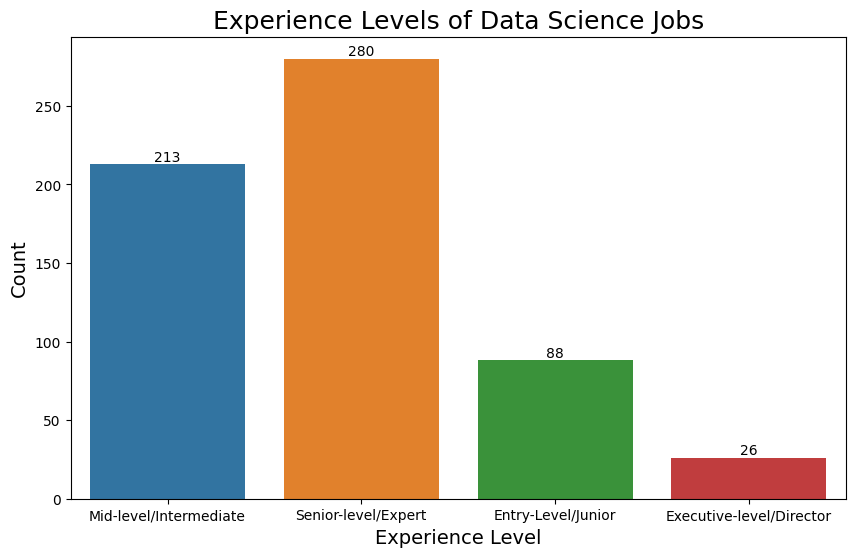

In [23]:
plt.figure(figsize=(10,6))
plt.title('Experience Levels of Data Science Jobs', fontsize=18)
ax = sns.countplot (x='experience_level', data=ds)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()
    

A large amount of people are of Data Science Professionals occupy Senior-level/Expert as well as Mid-level/Intermediate positions. However, Executive-level/Directors in Data Science are few, only 26 of the dataset

### EMPLOYMENT TYPE 

In [24]:
ds.employment_type.replace({'PT':'Part-time','FT':'Full-time','CT':'Contract','FL':'Freelance'}, inplace=True)

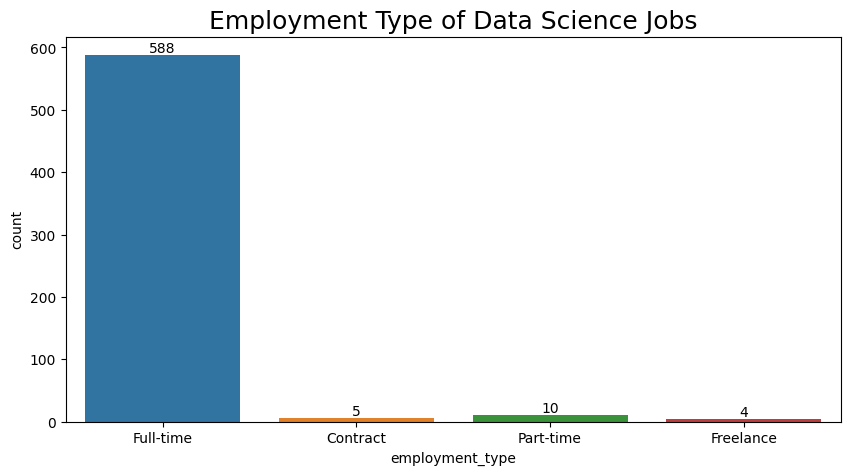

In [25]:
plt.figure(figsize=(10,5))
plt.title('Employment Type of Data Science Jobs', fontsize=18)
ax = sns.countplot (x='employment_type', data=ds)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Full time employment is the most common employment Type in  dataset and the other employment  are a total of 19. Freelance is the least with only 4 records.

### Employee Residence & Company Location 

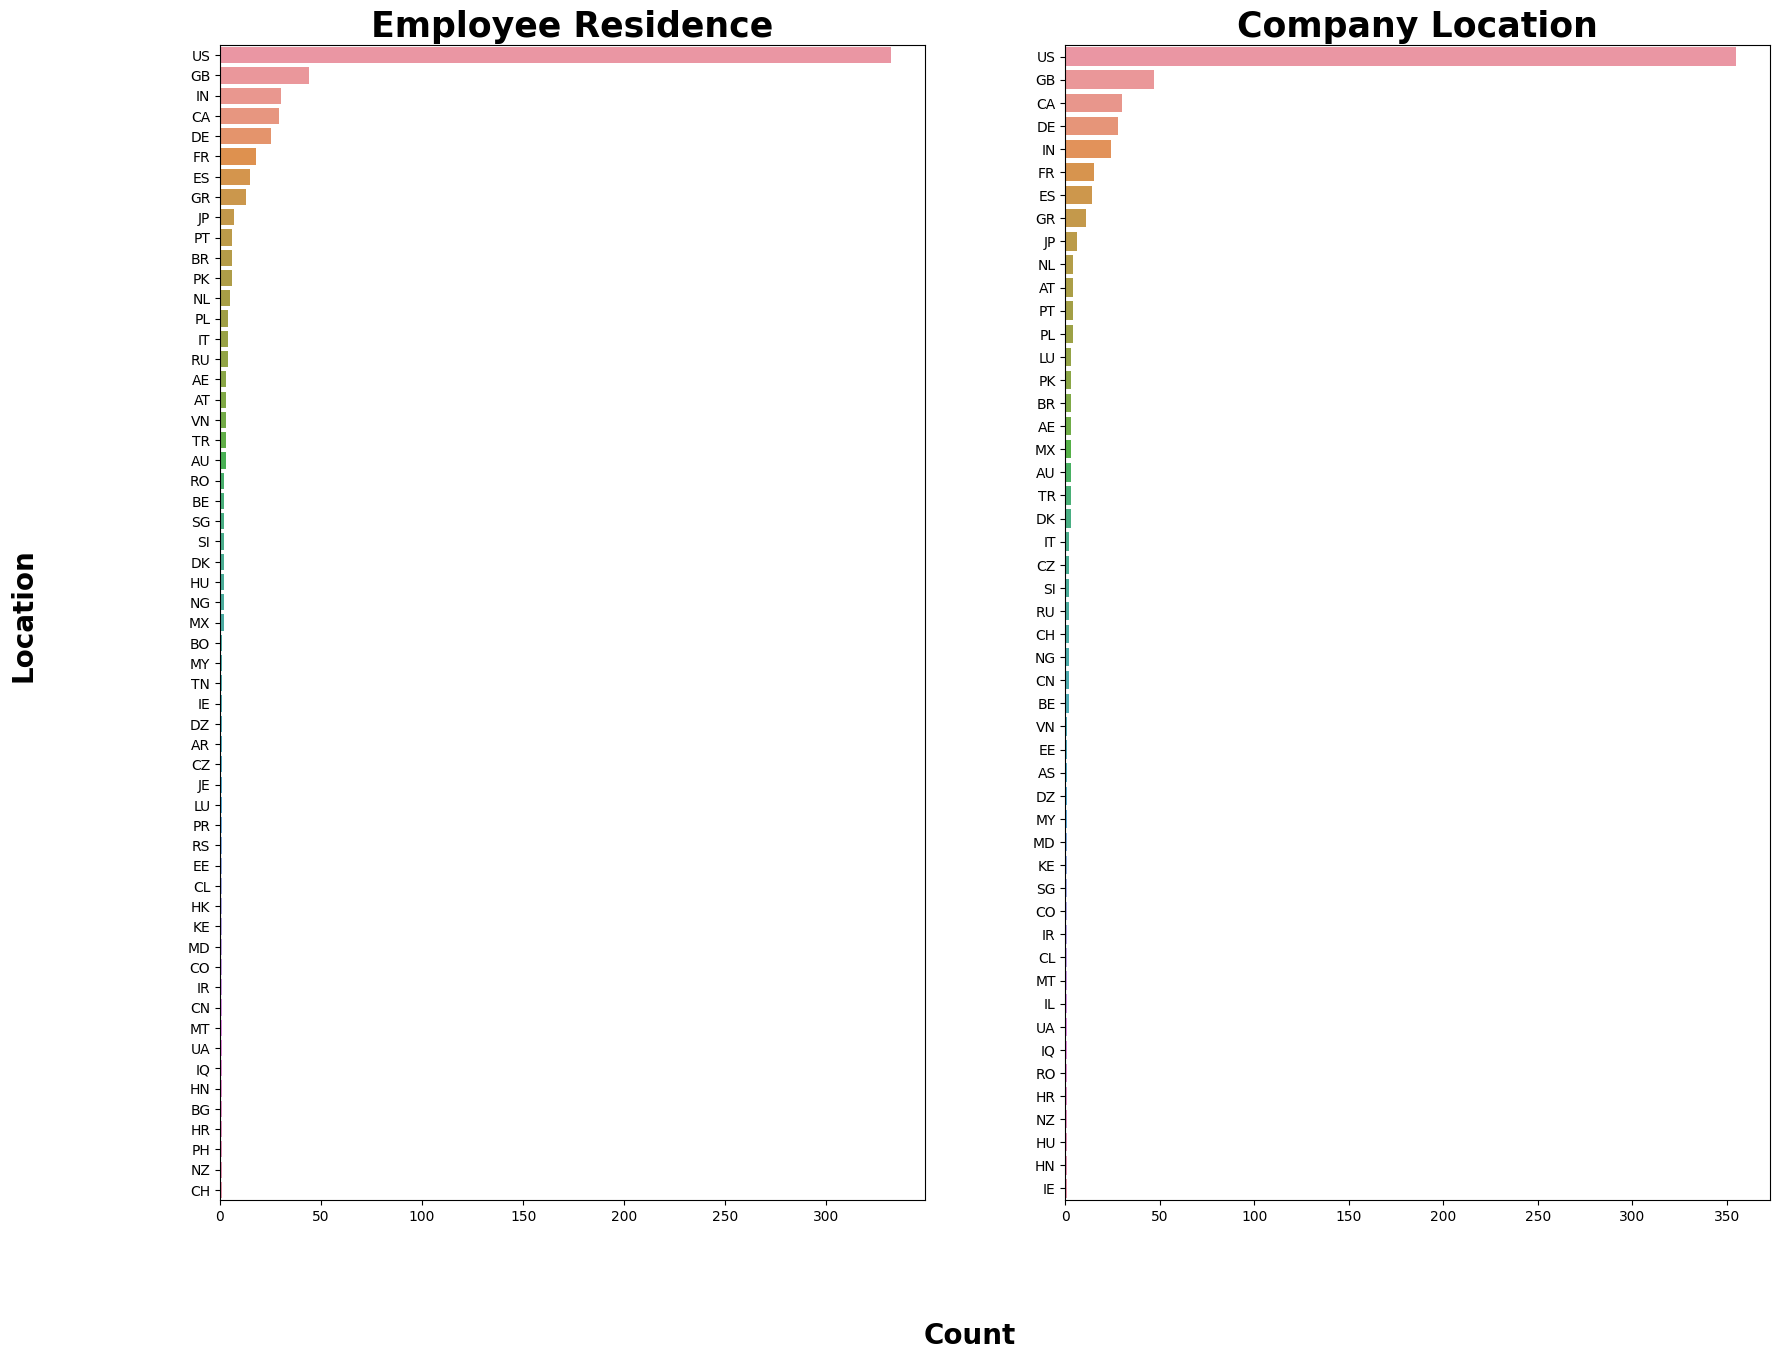

In [26]:
fig,axes=plt.subplots(1,2,figsize=(20,15))
sns.countplot(ax=axes[0],y='employee_residence', data=ds, order=ds['employee_residence'].value_counts().index)
sns.countplot(ax=axes[1],y='company_location', data=ds,  order=ds['company_location'].value_counts().index)

axes[0].set_title('Employee Residence', fontsize=25, fontweight='bold')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set_title('Company Location', fontsize=25, fontweight='bold')
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

fig.supxlabel('Count', fontsize=20, fontweight='bold')
fig.supylabel('Location', fontsize=20, fontweight='bold')

plt.show()

For Employee Residence and Company location, the US is the highest in terms of frequency, followed by Great Britain. A total of over 300 Employees and Companies are resident in the US while other locations record values below 50 for both Employee residence and company location.

### Company size 

In [29]:
size_ratio = ds.company_size.value_counts(normalize=True)

In [30]:
size_ratio

M    0.537068
L    0.326194
S    0.136738
Name: company_size, dtype: float64

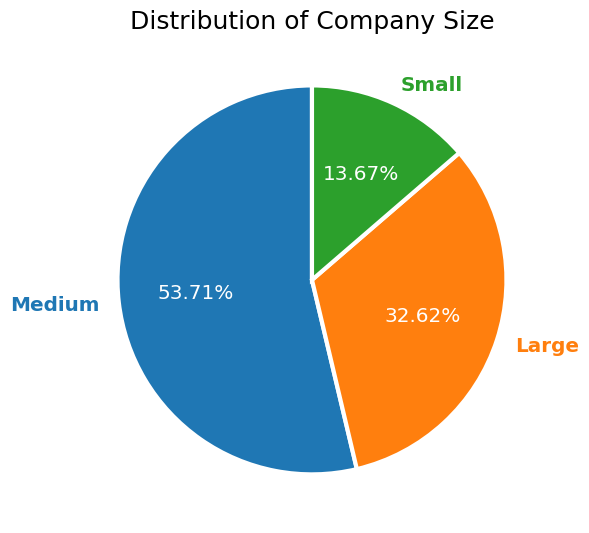

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
x=size_ratio
labels = ['Medium','Large','Small']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Distribution of Company Size', fontsize=18)
plt.tight_layout()

Most companies with Data Science Professionals are Medium Sized companies. Small companies have the least number of Data Science jobs.

### Work Year 

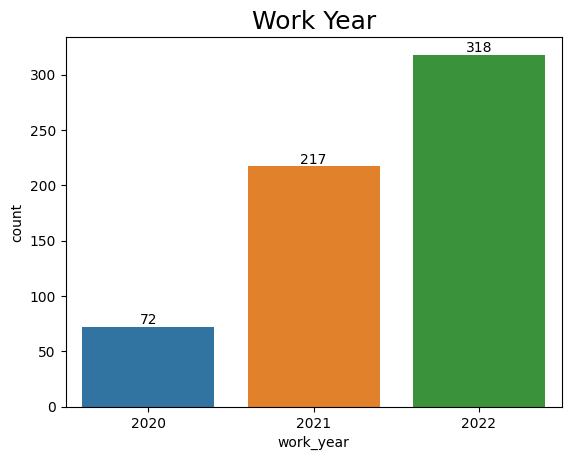

In [33]:
plt.title ('Work Year', fontsize=18)
ax = sns.countplot(x='work_year', data=ds)
for i in ax.containers:
    ax.bar_label(i)

The Dataset contains values from 2020 - 2022, here we can 2022 has highest work year compared to other years.

### Remote ratio by work year

In [35]:
ds.remote_ratio.replace({0:'No remote work',50:'Partially remote',100:'Fully remote'}, inplace=True)

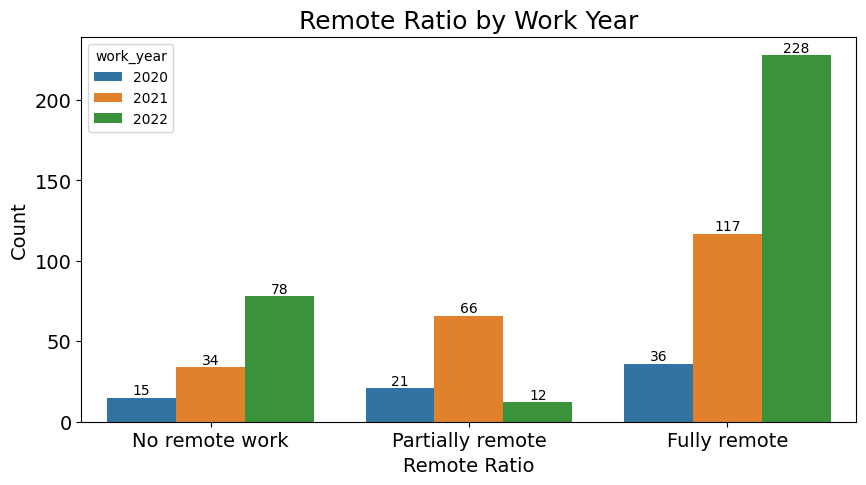

In [36]:
plt.figure(figsize=(10,5))
plt.title("Remote Ratio by Work Year", fontsize=18)
ax = sns.countplot(x='remote_ratio', data=ds, hue = 'work_year')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Remote Ratio", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Here the plot show the remote ratio over the year, we can say that in the year almost in 2020 it was no remote work that means working in diffrent place examole work from home,similary partially remote and fully remote in year 2022 the ratio of fully remote was more.

### Employment Type by Experience Level 

In [38]:
type_level = pd.crosstab(ds['employment_type'],ds['experience_level'])
display(type_level)

experience_level,Entry-Level/Junior,Executive-level/Director,Mid-level/Intermediate,Senior-level/Expert
employment_type,,,,
Contract,2,1,1,1
Freelance,0,0,3,1
Full-time,79,25,206,278
Part-time,7,0,3,0


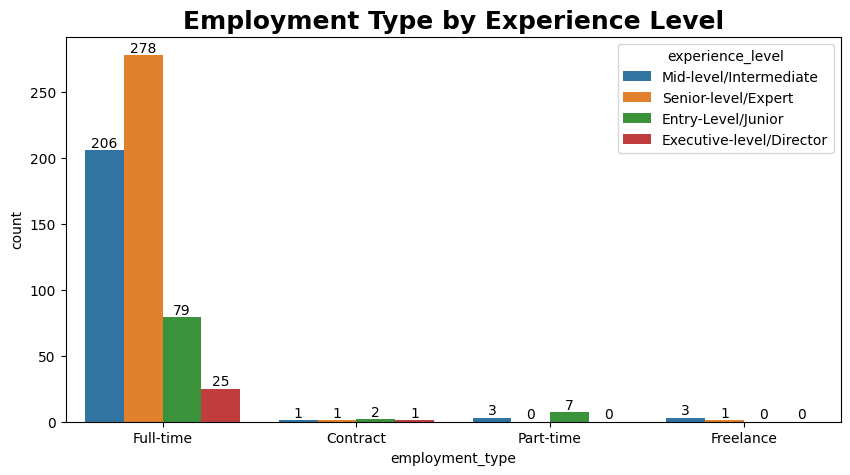

In [39]:
plt.figure(figsize=(10,5))
plt.title('Employment Type by Experience Level', fontsize=18, weight='bold')
ax=sns.countplot(x='employment_type', data=ds, hue = 'experience_level')
for i in ax.containers:
    ax.bar_label(i)

The plot shows the Employment type by experience level,here we can tell that full-time employee has all the experience level compared to other level like contract,part-time and freelance. 

### Top 5 Job Title by Experience Level

In [40]:
top_titles = ds['job_title'].value_counts()[:5]
top_titles

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: job_title, dtype: int64

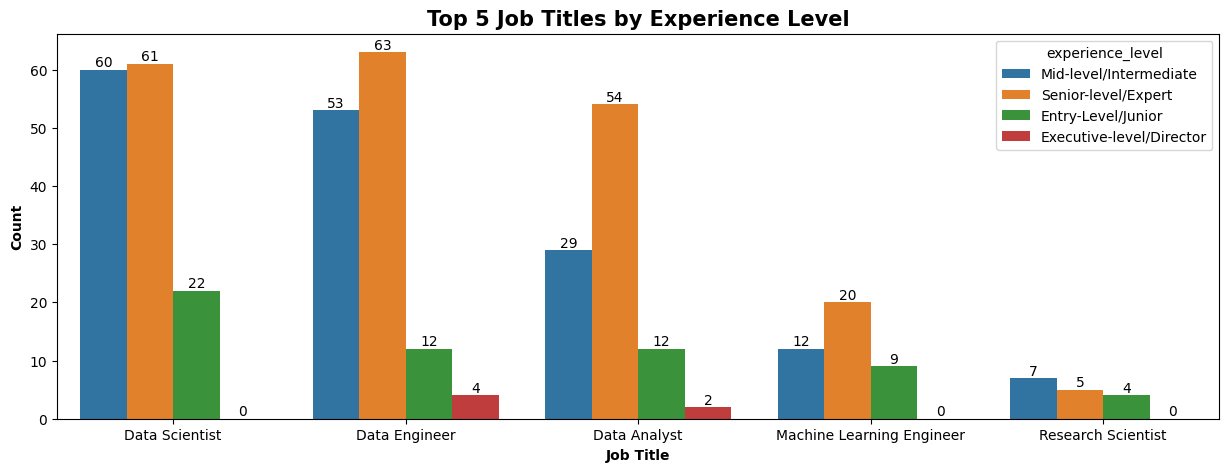

In [42]:
plt.figure(figsize=(15,5))
plt.title('Top 5 Job Titles by Experience Level', fontsize=15, fontweight='bold')
ax=sns.countplot(x='job_title', hue='experience_level', data=ds, 
              order=ds['job_title'].value_counts().iloc[:5].index)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Job Title', fontsize=10, fontweight='bold')
plt.show()


The above plot shows the Top 5 job titles by experience level.We can tell that in data scientist job mid-level and senior level are more.Similarly Data engineer job senior level is more compared to all other level.Data analyst also senior level are more,Machine learning enginering even that jon has more senior level compared to other level.last research Scientist job mid level are more comapred to other level.

### Distribution of salary by work year 

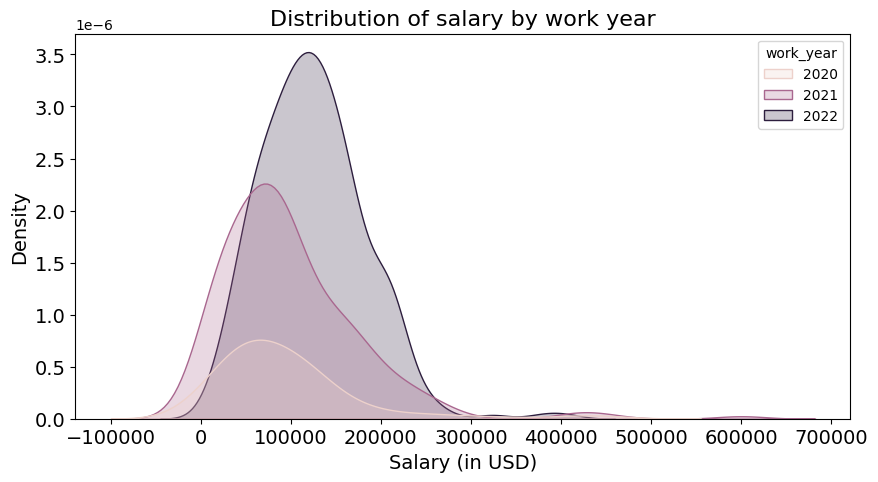

In [43]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds, x='salary_in_usd', hue='work_year', fill=True)
plt.title("Distribution of salary by work year", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The plot shows that the distribution of salary over the work year ,in 2022 the salary was increased compared to other years.

In [45]:
ds['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

### Salary by Experience Level 

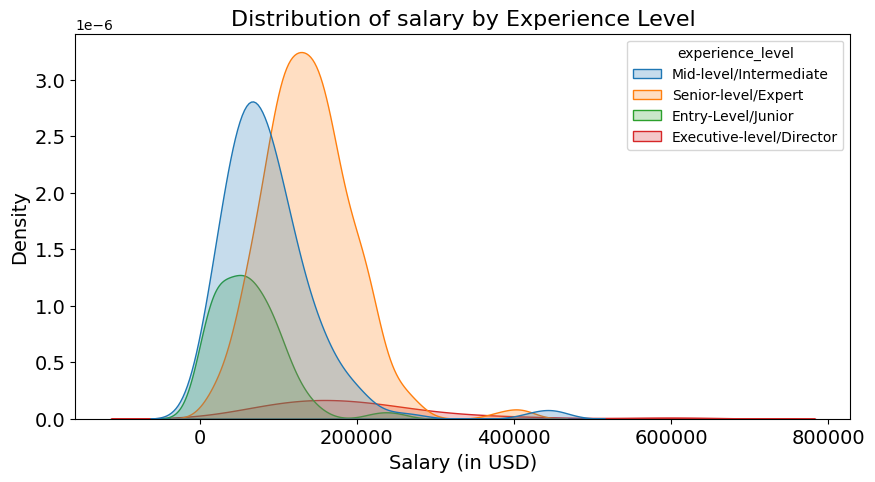

In [46]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds, x='salary_in_usd', hue='experience_level', fill=True)
plt.title("Distribution of salary by Experience Level", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The average salary is higher for a higher experience level. Executive-level/Directors are paid the highest salaries of all the experience levels on average, and Entry-level are the least earners

### Highest salaries by job title

In [50]:
title= pd.pivot_table(data=ds,index=['job_title'],values=['salary_in_usd'], aggfunc='max').sort_values(by=['salary_in_usd'],ascending=False)
display(title)


,salary_in_usd
job_title,
Principal Data Engineer,600000
Financial Data Analyst,450000
Research Scientist,450000
Applied Machine Learning Scientist,423000
Principal Data Scientist,416000
Data Scientist,412000
Data Analytics Lead,405000
Applied Data Scientist,380000
Director of Data Science,325000


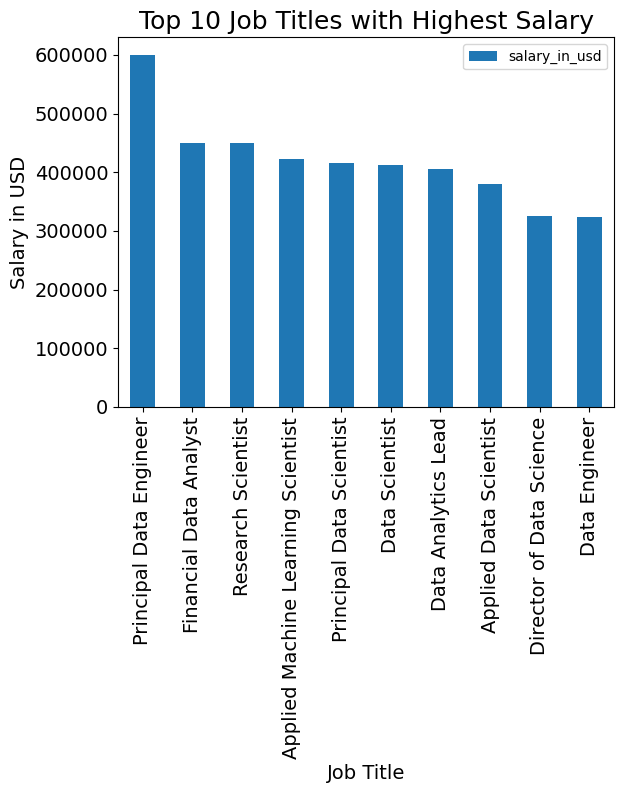

In [51]:
title.head(10).plot.bar()
plt.title('Top 10 Job Titles with Highest Salary', fontsize=18)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Here the plot shows the highest salary paid for jobs,principal data engineer has hishest salary,than financial data analystand research scientist have same pacakges and others follows

### Average salary for jobs 

In [57]:
loc_sal = pd.pivot_table(data=ds,index=['company_location'],values=['salary_in_usd']).sort_values(by=['salary_in_usd'],ascending=False)
display(loc_sal)

,salary_in_usd
company_location,
RU,157500.000000
US,144055.261972
NZ,125000.000000
IL,119059.000000
JP,114127.333333
AU,108042.666667
AE,100000.000000
DZ,100000.000000
IQ,100000.000000


<Axes: ylabel='company_location'>

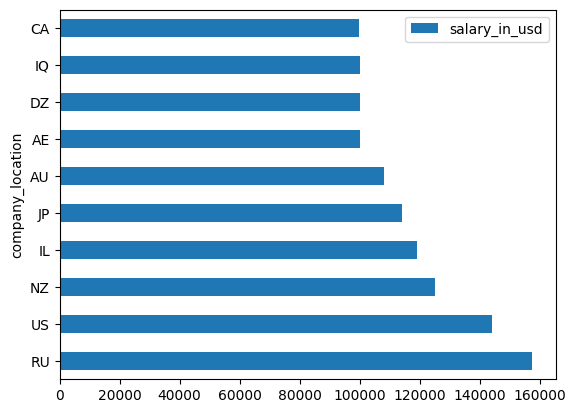

In [58]:
loc_sal.head(10).plot.barh()

The average salary for  Jobs in USD is 100000 to 120000 Usd.

### Size of company by Experience level

In [60]:
size_level = pd.crosstab(ds['company_size'],ds['experience_level'])
display(size_level)

experience_level,Entry-Level/Junior,Executive-level/Director,Mid-level/Intermediate,Senior-level/Expert
company_size,,,,
L,29,11,86,72
M,30,12,98,186
S,29,3,29,22


<Figure size 1000x500 with 0 Axes>

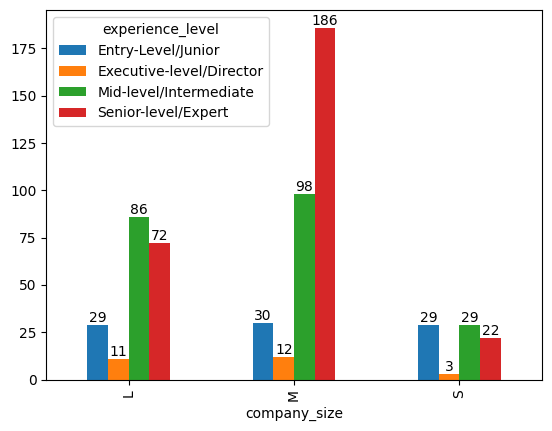

In [62]:
plt.figure(figsize=(10,5))
ax=size_level.plot.bar()
for i in ax.containers:
    ax.bar_label(i)

From the plot we can say that mid level are more in large similarly senior level are more in medium and small level, all experience level are less compared to other level


<img src ="https://images.pexels.com/photos/2889685/pexels-photo-2889685.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500" width="800" height="750">
